In [6]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict

In [17]:
# Define the state
class BMIState(TypedDict):
    
    weight_kg: float
    height_m: float
    bmi: float
    bmi_category: str

In [5]:
# Calculate BMI
def calculate_bmi(state: BMIState) -> BMIState:
    
    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    
    return state
    

In [18]:
def bmi_category(state: BMIState) -> BMIState:
    
    bmi = state['bmi']

    if bmi < 18.5:
        state['bmi_category'] = 'Underweight'
    elif bmi >= 18.5 and bmi < 24.9:
        state['bmi_category'] = 'Fit'
    elif bmi >= 25 and bmi < 29.9:
        state['bmi_category'] = 'Overweight'
    else:
        state['bmi_category'] = 'Obese'

    return state

In [19]:
graph = StateGraph(BMIState)

# Add nodes
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('bmi_category', bmi_category)

# Add edges
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi','bmi_category')
graph.add_edge('bmi_category', END)

# Compile the workflow
workflow = graph.compile()

In [25]:
initial_state = {'weight_kg': 58, 'height_m': 1.80}

result = workflow.invoke(initial_state)

print(result)

{'weight_kg': 58, 'height_m': 1.8, 'bmi': 17.9, 'bmi_category': 'Underweight'}


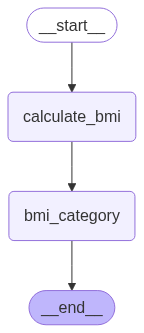

In [20]:
## Visualize the workflow

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())